In [1]:
import sys
sys.path.append('../utils')

from util import get_unique_val_count, check_missing_values, imbalance_check, get_max_class, get_outliers, get_unique_cat_val

from util import plot_count, plot_cat_count, plot_num_dist, plot_cat_pie, plot_cat_count_by_var
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

plt.style.use("dark_background")
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

pd.set_option('display.max_columns', 45)

In [2]:
df_inc = pd.read_csv('../data/income_inequality.csv')
df_inc.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [3]:
df_inc.shape

(209499, 43)

In [4]:
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
data_rows = get_unique_cat_val(df_inc)
for mdict in data_rows:
    print(mdict['col'])
    print('-' * 50)
    print(mdict['unique'])
    print('\n')

ID
--------------------------------------------------
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']


gender
--------------------------------------------------
[' Female' ' Male']


education
--------------------------------------------------
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']


class
--------------------------------------------------
[nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked']


education_institute
-----------

In [6]:
# Replace ' ?' with NaN
df_inc.replace({' ?':np.nan}, inplace=True)

### Data Preprocessing

In [7]:
check_missing_values(df_inc)

,col,dtype,miss_val,pct_miss_val
0,veterans_admin_questionnaire,object,207415,99.01
1,unemployment_reason,object,202979,96.89
2,education_institute,object,196197,93.65
3,old_residence_state,object,193889,92.55
4,old_residence_reg,object,193148,92.20
5,migration_prev_sunbelt,object,193148,92.20
6,is_labor_union,object,189420,90.42
7,under_18_family,object,151654,72.39
8,migration_code_change_in_reg,object,106284,50.73
9,residence_1_year_ago,object,106284,50.73


In [8]:
# Drop columns missing more than 50% values
drop_cols = [col for col in df_inc.columns if df_inc[col].isna().sum() / df_inc.shape[0]  > 0.5]
df_inc = df_inc.drop(columns=drop_cols, axis=1)

In [9]:
imbalance_check(df_inc)

,col,class,pct,pct_miss_val,impute_mode_pct
0,income_above_limit,Below limit,93.80,0.00,93.80
1,country_of_birth_own,US,88.62,1.75,90.37
2,citizenship,Native,88.63,0.00,88.63
3,is_hispanic,All other,86.11,0.00,86.11
4,race,White,83.87,0.00,83.87
5,country_of_birth_mother,US,80.30,3.11,83.41
6,country_of_birth_father,US,79.70,3.43,83.13
7,employment_commitment,Children or Armed Forces,61.95,0.00,61.95
8,gender,Female,51.93,0.00,51.93
9,industry_code_main,Not in universe or children,50.45,0.00,50.45


In [10]:
df_inc = df_inc.drop(columns=['ID', 'country_of_birth_own', 'country_of_birth_mother', 'country_of_birth_father'])

In [11]:
df_inc.shape

(209499, 25)

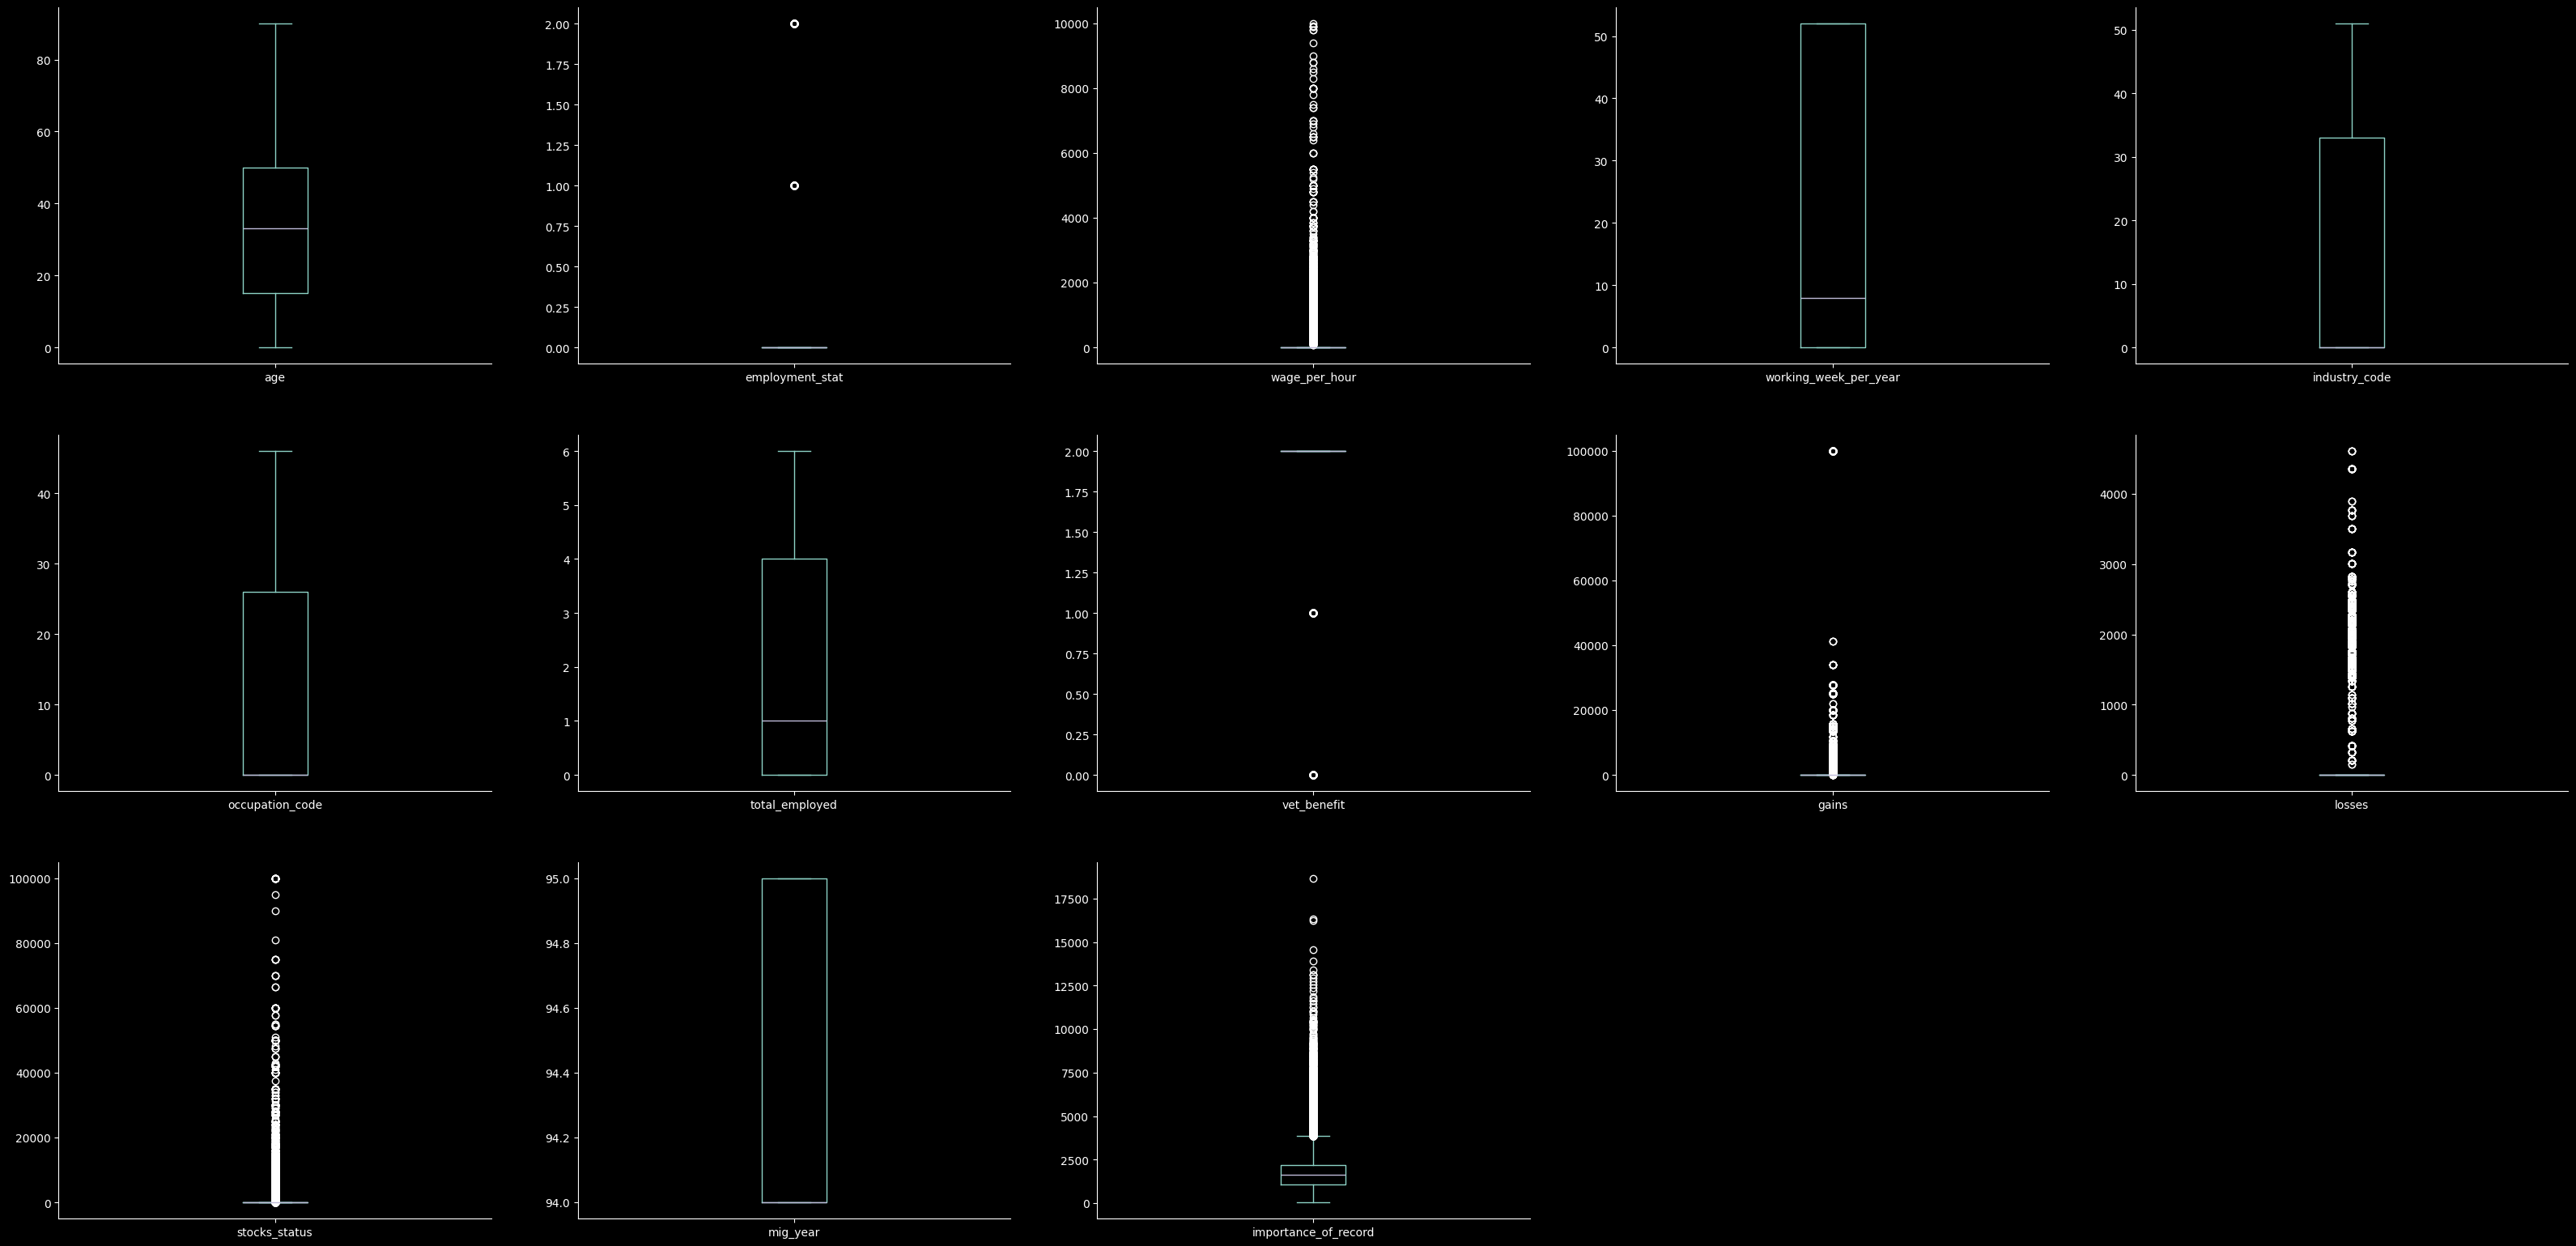

In [12]:
df_inc.plot(kind="box", 
                vert=True,
                subplots=True, 
                layout = (6,5), 
                figsize=(40,40), 
                sharex=False, 
                sharey=False);

In [13]:
# check for outliers
for col in ['wage_per_hour','gains','losses','stocks_status','importance_of_record']:
    out = get_outliers(df_inc[col])
    print(col, '-', str(out), '% outliers')

wage_per_hour - 5.66 % outliers
gains - 3.74 % outliers
losses - 1.94 % outliers
stocks_status - 10.52 % outliers
importance_of_record - 3.23 % outliers


In [14]:
data_rows = get_unique_cat_val(df_inc)
for mdict in data_rows:
    print(mdict['col'])
    print('-' * 50)
    print(mdict['unique'])
    print('\n')

gender
--------------------------------------------------
[' Female' ' Male']


education
--------------------------------------------------
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']


marital_status
--------------------------------------------------
[' Widowed' ' Never married' ' Married-civilian spouse present'
 ' Divorced' ' Married-spouse absent' ' Separated'
 ' Married-A F spouse present']


race
--------------------------------------------------
[' White' ' Black' ' Asian or Pacific Islander'
 ' Amer Indian Aleut or Eskimo' ' Other']


is_hispanic
-----------------------------

In [15]:
df_inc.drop(columns=['household_stat'], axis=1, inplace=True)

In [16]:
df_inc.shape

(209499, 24)

In [17]:
# class distribution in response variable
round(df_inc['income_above_limit'].value_counts(normalize=True), 2)


income_above_limit
Below limit    0.94
Above limit    0.06
Name: proportion, dtype: float64

Since the class imbalance is very high, we will need to upsample the data since the monirity class in only 6% of the data.

In [18]:
X = df_inc.drop(['income_above_limit'], axis=1)
y = df_inc['income_above_limit']

#### Oversample data set fix data imbalance

In [19]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [20]:
y_resampled.value_counts()

income_above_limit
Below limit    196501
Above limit    196501
Name: count, dtype: int64

#### Train-Test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(314401, 23)
(78601, 23)
(314401,)
(78601,)


In [23]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,32,Male,High school graduate,Divorced,White,All other,Children or Armed Forces,0,0,52,49,Public administration,33,1,Householder,2,Head of household,0,0,0,Native,94,1207.45
1,74,Female,High school graduate,Married-civilian spouse present,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Spouse of householder,2,Nonfiler,0,0,0,Native,94,2242.96
2,43,Male,Associates degree-academic program,Never married,White,All other,Unemployed part- time,0,0,52,29,Transportation,15,6,Householder,2,Single,0,0,0,Native,95,3371.85
3,43,Male,Some college but no degree,Never married,White,All other,Full-time schedules,0,0,52,30,Communications,14,6,Householder,2,Single,0,0,125,Native,95,1315.73
4,22,Female,Some college but no degree,Never married,White,Other Spanish,Not in labor force,0,0,0,0,Not in universe or children,0,0,Child 18 or older,2,Nonfiler,0,0,0,Native,95,691.33


In [24]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
0,28,Male,High school graduate,Married-civilian spouse present,White,Puerto Rican,Children or Armed Forces,0,0,52,4,Construction,34,2,Householder,2,Joint both under 65,0,0,0,Native,94,905.79
1,21,Male,High school graduate,Never married,White,All other,Full-time schedules,0,800,45,4,Construction,39,6,Householder,2,Single,27828,0,0,Native,95,1299.69
2,43,Female,Some college but no degree,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,29,Transportation,38,6,Spouse of householder,2,Joint both under 65,0,0,0,Native,95,3852.26
3,40,Female,11th grade,Widowed,White,Central or South American,Children or Armed Forces,0,650,52,33,Retail trade,26,3,Householder,2,Head of household,0,0,0,Native,94,1081.40
4,6,Male,Children,Never married,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,3522.25


#### Encode variables

The correct approach to performing data preparation with a train-test split evaluation is to fit the data preparation on the training set, then apply the transform to the train and test sets. This requires that we first split the data into train and test sets. We can then define the scaling, encoding methods and call the fit() function on the training set, then apply the transform() function on the train and test sets to create a normalized version of each dataset.

In [25]:
cols_to_encode = ['gender','education','marital_status','race','is_hispanic','employment_commitment','industry_code_main',
                     'household_summary','tax_status','citizenship']
remainder_cols = X_train.drop(columns=cols_to_encode, axis=1).columns


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(X_train[cols_to_encode]) 

df_encoded_cols = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols_to_encode))
X_train_encoded = pd.concat([df_encoded_cols, X_train[remainder_cols]], axis=1)


In [26]:
X_train_encoded.head()

,gender_ Female,gender_ Male,education_ 10th grade,education_ 11th grade,education_ 12th grade no diploma,education_ 1st 2nd 3rd or 4th grade,education_ 5th or 6th grade,education_ 7th and 8th grade,education_ 9th grade,education_ Associates degree-academic program,education_ Associates degree-occup /vocational,education_ Bachelors degree(BA AB BS),education_ Children,education_ Doctorate degree(PhD EdD),education_ High school graduate,education_ Less than 1st grade,education_ Masters degree(MA MS MEng MEd MSW MBA),education_ Prof school degree (MD DDS DVM LLB JD),education_ Some college but no degree,marital_status_ Divorced,marital_status_ Married-A F spouse present,marital_status_ Married-civilian spouse present,...,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single,citizenship_ Foreign born- Not a citizen of U S,citizenship_ Foreign born- U S citizen by naturalization,citizenship_ Native- Born abroad of American Parent(s),citizenship_ Native- Born in Puerto Rico or U S Outlying,citizenship_Native,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32,0,0,52,49,33,1,2,0,0,0,94,1207.45
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,74,0,0,0,0,0,0,2,0,0,0,94,2242.96
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,43,0,0,52,29,15,6,2,0,0,0,95,3371.85
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,43,0,0,52,30,14,6,2,0,0,125,95,1315.73
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,22,0,0,0,0,0,0,2,0,0,0,95,691.33


In [27]:
X_train_encoded.shape

(314401, 105)

In [28]:
# Encode X_test
encoded_cols = encoder.transform(X_test[cols_to_encode]) 
df_encoded_cols = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols_to_encode))
X_test_encoded = pd.concat([df_encoded_cols, X_test[remainder_cols]], axis=1)

In [29]:
X_test_encoded.shape

(78601, 105)

In [30]:
# Encode y
y_train.replace({'Below limit':0, 'Above limit':1}, inplace=True)
y_test.replace({'Below limit':0, 'Above limit':1}, inplace=True)

#### Modeling

#### Random Forest

In [31]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [32]:
print(X_train_encoded.shape)
print(y_train.shape)

(314401, 105)
(314401,)


In [33]:
y_pred_rf = rf.predict(X_test_encoded)
f1_rf = round(f1_score(y_test, y_pred_rf), 2)
print('Random Forest Classifier')
print('-' * 30) 
print('F1 Score:', f1_rf)

Random Forest Classifier
------------------------------
F1 Score: 0.99


In [34]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     39578
           1       0.98      1.00      0.99     39023

    accuracy                           0.99     78601
   macro avg       0.99      0.99      0.99     78601
weighted avg       0.99      0.99      0.99     78601



#### XGBoost Classifier

In [35]:
xgb = XGBClassifier()
xgb.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred_xgb = xgb.predict(X_test_encoded)
f1_xgb = round(f1_score(y_test, y_pred_xgb), 2)
print('XGBoost Classifier')
print('-' * 30) 
print('F1 Score:', f1_xgb)

XGBoost Classifier
------------------------------
F1 Score: 0.91


In [37]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     39578
           1       0.89      0.94      0.91     39023

    accuracy                           0.91     78601
   macro avg       0.91      0.91      0.91     78601
weighted avg       0.91      0.91      0.91     78601



We are getting better accuracy with Random Forest compared to XGBoost